<a href="https://colab.research.google.com/github/rosegebhardt/me451-final/blob/main/me451_RLfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-rl2
!pip install 'gym[all]'
!pip install pyglet

  Using cached https://files.pythonhosted.org/packages/cf/8c/64e0630b3d450244feef0688d90eab2448631e40ba6bdbd90a70b84898e7/mujoco-py-1.50.1.68.tar.gz
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
    Running setup.py install for mujoco-py ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-coj282ht/mujoco-py/setup.py'"'"'; __file__='"'"'/tmp/pip-install-coj282ht/mujoco-py/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-3kkrge4u/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
!pip install pyglet --upgrade
!pip freeze | grep pyglet

  Using cached https://files.pythonhosted.org/packages/b8/9a/2872519f457f94bb8ef7c9d62b6b71744cb57f7ead58dcb653f333c98b8b/pyglet-1.5.16-py3-none-any.whl
ERROR: gym 0.17.3 has requirement pyglet<=1.5.0,>=1.4.0, but you'll have pyglet 1.5.16 which is incompatible.
  Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0


pyglet==1.5.16


In [ ]:
!git clone https://github.com/openai/gym.git
!cd gym
!pip install -e

!apt-get install -y xvfb x11-utils
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

fatal: destination path 'gym' already exists and is not an empty directory.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

-e option requires 1 argument
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Using cached https://files.pythonhosted.org/packages/70/ca/20aee170afe6011e295e34b27ad7d7ccd795faba581dd3c6f7cec237f561/pyglet-1.5.0-py2.py3-none-any.whl
  Found ex

In [ ]:
# Import everything
import gym
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense, Activation, Reshape
from keras.optimizers import Adam
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent

# Create envronment
env = gym.make('CartPole-v1')
env.max_episode_steps = 500
num_actions = env.action_space.n

# Tensorboard?
# log_dir = "logs/fit/" #+ d5atetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir="logs/fit/")#, histogram_freq=1)
# tb = TensorBoard(log_dir='/keras-rl')

# Create simple neural network model  
observation = Input(shape=(1, ) + env.observation_space.shape)
x = Dense(16, activation='relu')(observation)
x = Dense(16, activation='relu')(x)
x = Dense(16, activation='relu')(x)
output = Dense(num_actions, activation='linear')(x) 
output = Reshape((num_actions, ))(output)
model = Model(inputs=observation, outputs=output)
print(model.summary())

memory = SequentialMemory(limit=100000, window_length=1)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                              attr='eps', 
                              value_max=1, 
                              value_min=0.1, 
                              value_test=0.05, 
                              nb_steps=10000)

# # Alternate DQNAgent method
# DQN = DQNAgent(model=model, nb_actions=num_actions, memory=memory, 
#     nb_steps_warmup=500, target_model_update=5e-2, policy=policy, 
#     enable_dueling_network=True, dueling_type='avg')

DQN = DQNAgent(model=model, 
               nb_actions=num_actions, 
               memory=memory, 
               nb_steps_warmup=500, 
               target_model_update=5e-2, 
               policy=policy, 
               gamma=0.99, 
               batch_size=32)

# Run, save output, test
DQN.compile(Adam(lr=1e-3), metrics=['mse'])
dqn_results = DQN.fit(env, nb_steps=100000, verbose=2, callbacks=None)
DQN.save_weights('dqn_cartpole_weights.h5f', overwrite=True)
dqn_test = DQN.test(env, nb_episodes=5, visualize=False) # cannot visualize on google colab

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 16)             80        
_________________________________________________________________
dense_5 (Dense)              (None, 1, 16)             272       
_________________________________________________________________
dense_6 (Dense)              (None, 1, 16)             272       
_________________________________________________________________
dense_7 (Dense)              (None, 1, 2)              34        
_________________________________________________________________
reshape_1 (Reshape)          (None, 2)                 0         
Total params: 658
Trainable params: 658
Non-trainable params: 0
_____________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


   146/100000: episode: 3, duration: 0.064s, episode steps:  78, steps per second: 1226, episode reward: 78.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.564 [0.000, 1.000],  loss: --, mse: --, mean_q: --, mean_eps: --
   180/100000: episode: 4, duration: 0.025s, episode steps:  34, steps per second: 1374, episode reward: 34.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.559 [0.000, 1.000],  loss: --, mse: --, mean_q: --, mean_eps: --
   194/100000: episode: 5, duration: 0.011s, episode steps:  14, steps per second: 1218, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: --, mse: --, mean_q: --, mean_eps: --
   229/100000: episode: 6, duration: 0.027s, episode steps:  35, steps per second: 1314, episode reward: 35.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.457 [0.000, 1.000],  loss: --, mse: --, mean_q: --, mean_eps: --
   240/100000: episode: 7, duration: 0.009s, episode steps:  11, steps per s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


   515/100000: episode: 22, duration: 0.766s, episode steps:  28, steps per second:  37, episode reward: 28.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.607 [0.000, 1.000],  loss: 0.468021, mse: 0.486725, mean_q: 0.174154, mean_eps: 0.954325
   531/100000: episode: 23, duration: 0.118s, episode steps:  16, steps per second: 136, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 0.367134, mse: 0.449317, mean_q: 0.374953, mean_eps: 0.952975
   592/100000: episode: 24, duration: 0.423s, episode steps:  61, steps per second: 144, episode reward: 61.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.574 [0.000, 1.000],  loss: 0.256060, mse: 1.368619, mean_q: 1.362888, mean_eps: 0.949510
   636/100000: episode: 25, duration: 0.311s, episode steps:  44, steps per second: 142, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.614 [0.000, 1.000],  loss: 0.446804, mse: 5.513984, mean_q: 3.147270,

In [ ]:
# Record observations during test
obs = np.zeros([100,4])
observation = env.reset()
for t in range(100):
    # env.render()
    obs[t] = observation
    # print(observation)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

Episode finished after 57 timesteps


Text(0, 0.5, 'Value')

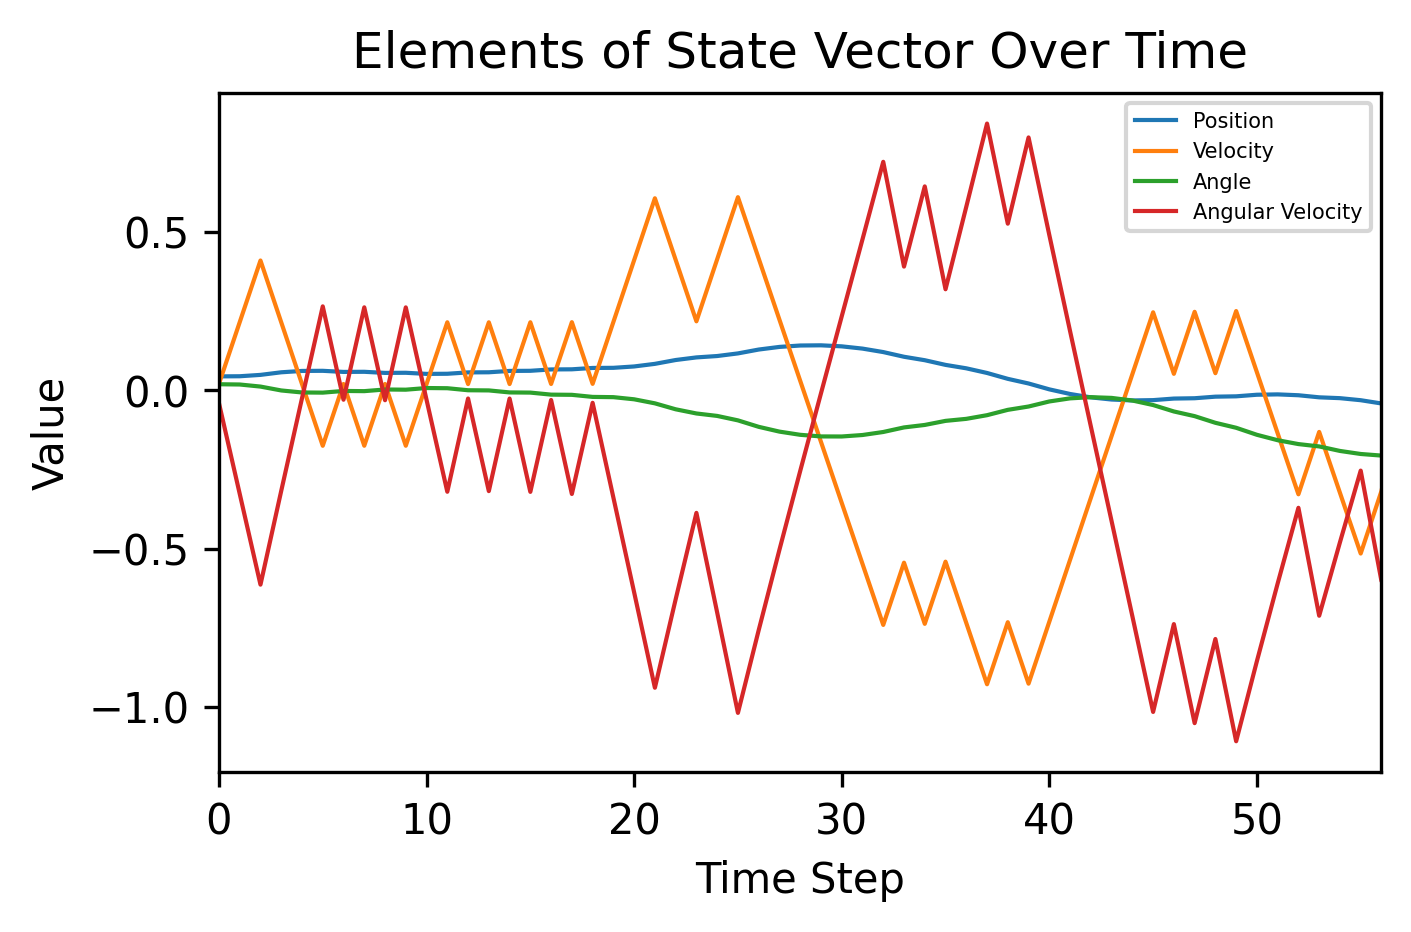

In [ ]:
# Plot State Vector (fails after 57 time steps)
fig = plt.figure(figsize=(5,3), dpi=300)
plt.plot(obs, linewidth=1)
plt.legend(['Position','Velocity','Angle','Angular Velocity'],loc='upper right',prop={'size': 5})
plt.xlim([0,56])
plt.title('Elements of State Vector Over Time')
plt.xlabel('Time Step')
plt.ylabel('Value')

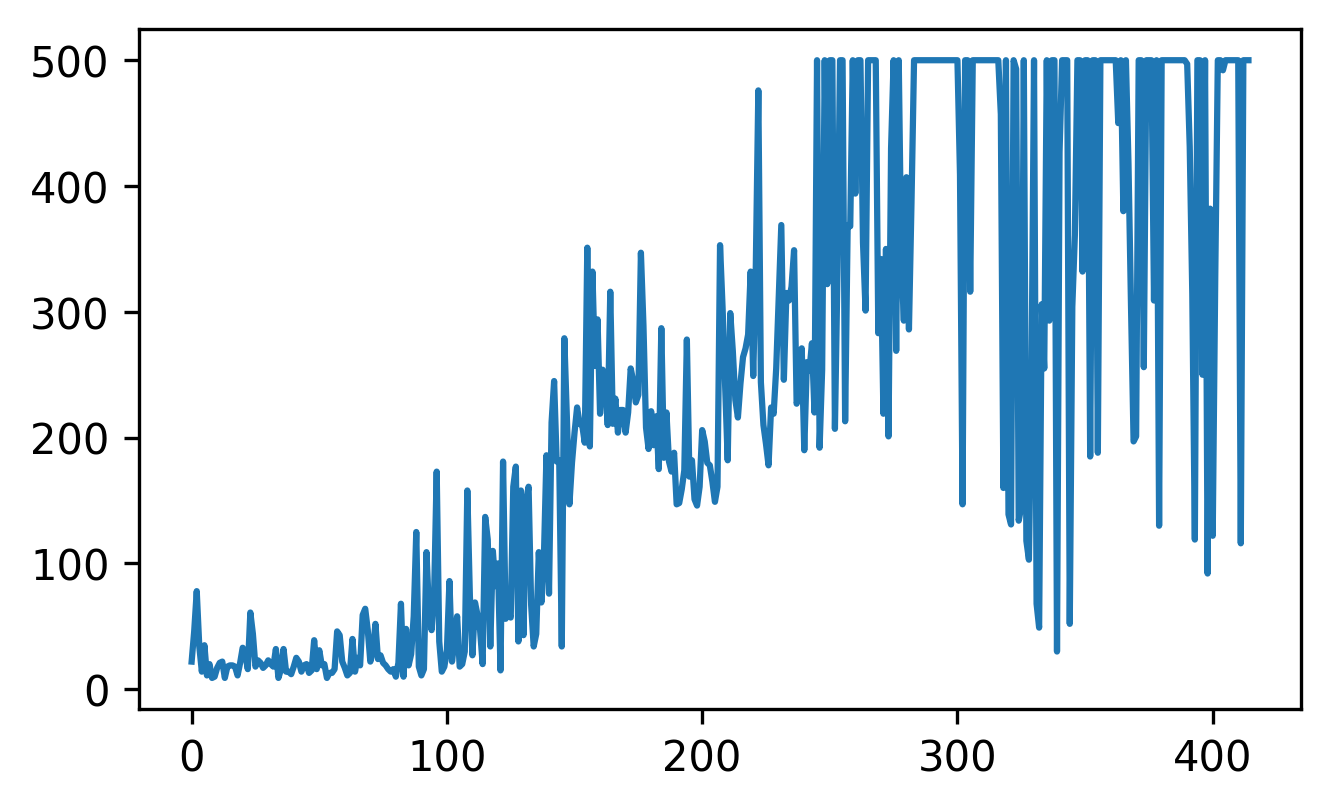

In [ ]:
# Plot reward curve
import numpy as np
import matplotlib.pyplot as plt
reward_list_dqn = dqn_results.history
# plt.plot(dqn_results.history)
dqn_list=list(reward_list_dqn.values())
dqn_arr = np.asarray(dqn_list)[1,:]

fig = plt.figure(figsize=(5,3), dpi=300)
x_coordinate = [ 1 * i for i in range(len(dqn_arr)) ]
plt.plot(x_coordinate,dqn_arr)
plt.show()
